<a href="https://colab.research.google.com/github/kavyajeetbora/EAST/blob/master/EAST_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Imports

[**Tasks - Incidental Scene Text**](https://rrc.cvc.uab.es/?ch=4&com=tasks)

In [11]:
!pip install lanms

     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for lanms: filename=lanms-1.0.2-cp36-cp36m-linux_x86_64.whl size=858376 sha256=88747b7b52ffce94c2a1944964bea3fcfa99fb687de945f4266770910dee2ecb
  Stored in directory: /root/.cache/pip/wheels/67/2d/7f/e554332de560b592612ba9e5711535d22b6ebd469295a50049
Successfully built lanms


In [0]:
import os
from PIL import Image
from torch.utils.model_zoo import load_url
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
import lanms

In [6]:
%%time

!git clone -l -s git://github.com/kavyajeetbora/EAST.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 72 (delta 40), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (72/72), 401.48 KiB | 6.69 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/cloned-repo/cloned-repo
dataset_original.py  detect.py		 EAST_text_detector.ipynb  model.py
dataset.py	     EAST_dataset.ipynb  loss.py		   train.py
CPU times: user 71.9 ms, sys: 19.4 ms, total: 91.3 ms
Wall time: 5.36 s


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from dataset_original import custom_dataset

# AI4Bharat dataset
image_address = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/Simple YOLO model/Data/Sample Images'
label_address = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/Simple YOLO model/Data/Sample Annotations'
model_path = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/EAST scene text detector/model_epoch_20.pth'


# icdar dataset
# image_address = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/EAST scene text detector/data/ICDAR dataset/Images'
# label_address = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/EAST scene text detector/data/ICDAR dataset/Labels'

training_dataset = custom_dataset(image_address, label_address)
print(len(training_dataset))

428


## Detecting

In [0]:
# set up the pretrained model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = EAST().to(device)
model.load_state_dict(torch.load(model_path))
model.eval()

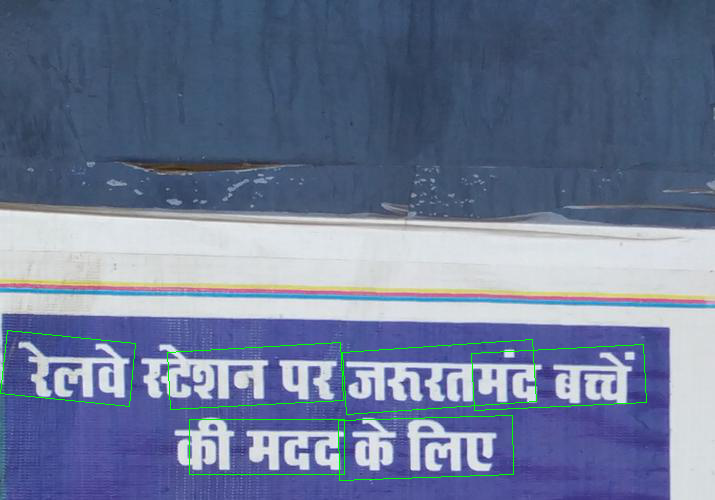

In [28]:
from detect import *
from model import EAST

## choose an random image
img_files = os.listdir(image_address)
index = np.random.choice(len(img_files))
image_path = os.path.join(image_address,img_files[index])


img = Image.open(image_path)
boxes = detect(img, model, device)
plot_boxes(img, boxes)